In [ ]:
## UTME installation
!pip install https://github.com/Labic-ICMC-USP/UTME/archive/refs/heads/main.zip

  Using cached https://github.com/Labic-ICMC-USP/UTME/archive/refs/heads/main.zip
  Preparing metadata (setup.py) ... done


## Installing the library

In [ ]:
!git clone https://github.com/mpferreira003/ClassUtilsLLM.git

Cloning into 'ClassUtilsLLM'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 95 (delta 41), reused 79 (delta 25), pack-reused 0 (from 0)
Receiving objects: 100% (95/95), 25.99 KiB | 8.66 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [ ]:
!pip install ClassUtilsLLM/

Processing ./ClassUtilsLLM
  Preparing metadata (setup.py) ... done
  Created wheel for ClassUtilsLLM: filename=ClassUtilsLLM-0.1.0-py3-none-any.whl size=13800 sha256=1bce76c3a19e00572525f0d2e59ca16ffbf9b75e5ed69a40897487f995021c67
  Stored in directory: /tmp/pip-ephem-wheel-cache-2pyrwjwu/wheels/8c/f0/29/f891c1921af4d4ac056901b2ea09ca40c4d42ff711bb2e72a0
Successfully built ClassUtilsLLM
  Attempting uninstall: ClassUtilsLLM
    Found existing installation: ClassUtilsLLM 0.1.0
    Uninstalling ClassUtilsLLM-0.1.0:
      Successfully uninstalled ClassUtilsLLM-0.1.0


## Testing library

In [ ]:
# Import necessary libraries for testing
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA # to apply PCA
import matplotlib.pyplot as plt
import numpy as np

In [37]:
DIMENSION = 384
POINTS = 3000


centers = 5
fake_embeddings,true_labels = make_blobs(n_samples=POINTS,
                             n_features=DIMENSION,
                             centers=5,
                             cluster_std=1,
                             random_state=42,
                             shuffle=True,
                             center_box=(-2,2))
fake_embeddings*=5

print(f"fake_embeddings shape: {fake_embeddings.shape}")
fake_embeddings_2d = PCA(n_components=2).fit_transform(fake_embeddings)
print(f"fake_embeddings PCA reduction: {fake_embeddings_2d.shape}")

fake_embeddings shape: (3000, 384)
fake_embeddings PCA reduction: (3000, 2)


## Plotting

In [ ]:
from ClassUtilsLLM.plotter import plot

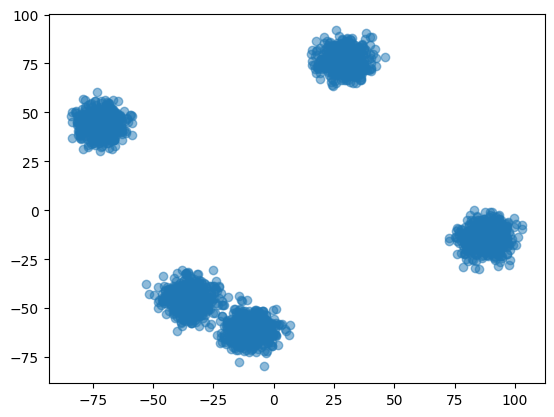

In [38]:
plot(fake_embeddings_2d)

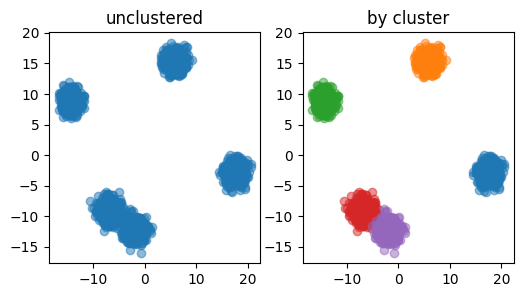

In [28]:
fig,axs = plt.subplots(1,2,figsize=(3*2,3))
plot(fake_embeddings_2d,y=None,title="unclustered",ax=axs[0])
plot(fake_embeddings_2d,y=true_labels,title="by cluster",ax=axs[1])
plt.show()

## Normalization

In [31]:
from ClassUtilsLLM.norm import norm,normalizers

In [44]:
embeddings_l1 = norm(fake_embeddings,normalizers.L1)
embeddings_l2 = norm(fake_embeddings,normalizers.L2)

vec_non = fake_embeddings[0]
vec_l1 = embeddings_l1[0]
vec_l2 = embeddings_l2[0]

print(f'unnormalized sample - sum={np.sum(abs(vec_non))} mean={np.mean(vec_non)} std={np.std(vec_non)}')
print(f'L1 sample -  sum={np.sum(abs(vec_l1))} mean={np.mean(vec_l1)} std={np.std(vec_l1)}')
print(f'L2 sample - sum={np.sum(abs(vec_l2))} mean={np.mean(vec_l2)} std={np.std(vec_l2)}')

unnormalized sample - sum=2398.7610495558747 mean=-0.40231693389119466 std=7.574834392963582
L1 sample -  sum=1.0 mean=-0.00016771863707128434 std=0.0031578111518719408
L2 sample - sum=16.13751064167929 mean=-0.0027065612905457967 std=0.05095921106774698


## Sampling

In [53]:
##sampling
from ClassUtilsLLM.sampling import sampling
from ClassUtilsLLM.sampling import methods as mS

k=10
samples_knear     = sampling(embeddings_l1,k,method=mS.KNEAR,n_clusters=5)
samples_kborder   = sampling(embeddings_l1,k,method=mS.KBORDER,n_clusters=5)
samples_krandom   = sampling(embeddings_l1,k,method=mS.KRANDOM,n_clusters=5)
samples_krcluster = sampling(embeddings_l1,k,method=mS.KRCLUSTER,n_clusters=5)
samples = {'knear':samples_knear,
           'kborder':samples_kborder,
           'krandom':samples_krandom,
           'krcluster':samples_krcluster}

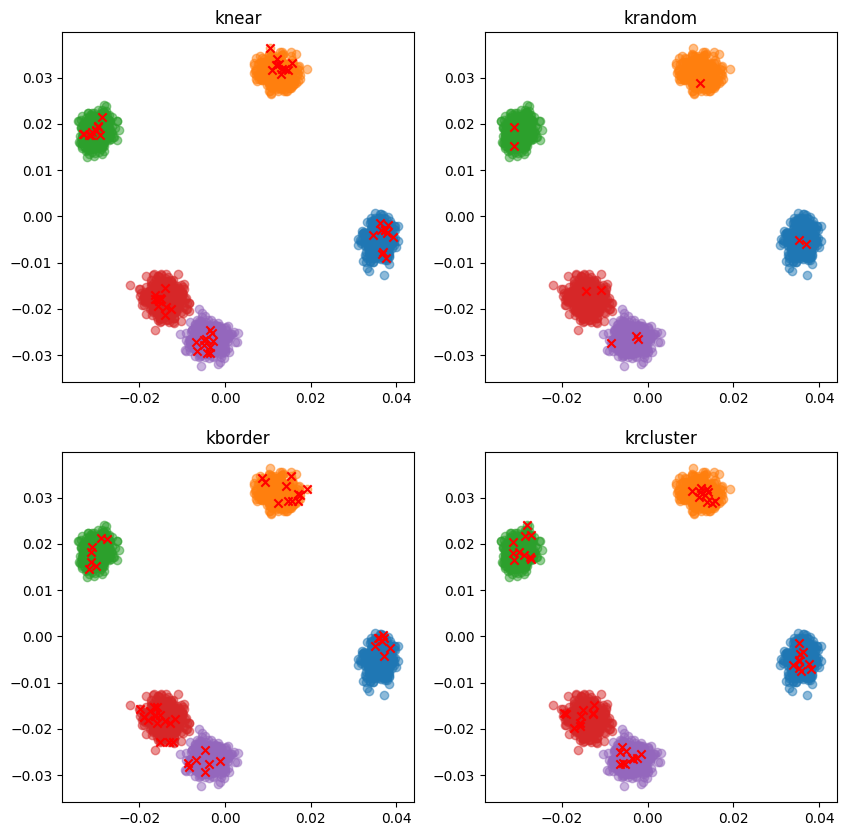

In [54]:
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k=50
embeddings_l1_2d = PCA(n_components=2).fit_transform(embeddings_l1)

fig,axs = plt.subplots(2,2,figsize=(5*2,5*2))
for i,(name,s) in enumerate(samples.items()):
  plot(embeddings_l1_2d,y=true_labels,ax=axs[i%2][int(i/2)],title=name)
  axs[i%2][int(i/2)].scatter(embeddings_l1_2d[s,0],embeddings_l1_2d[s,1],color='red',marker='x')

plt.show()
